In [1]:


import pandas as pd
import re
import matplotlib.pyplot as plt
import os
import numpy as np
import sys
sys.path.insert(0, "/Users/mbornhol/git/neural-profiling")
from utils import eval

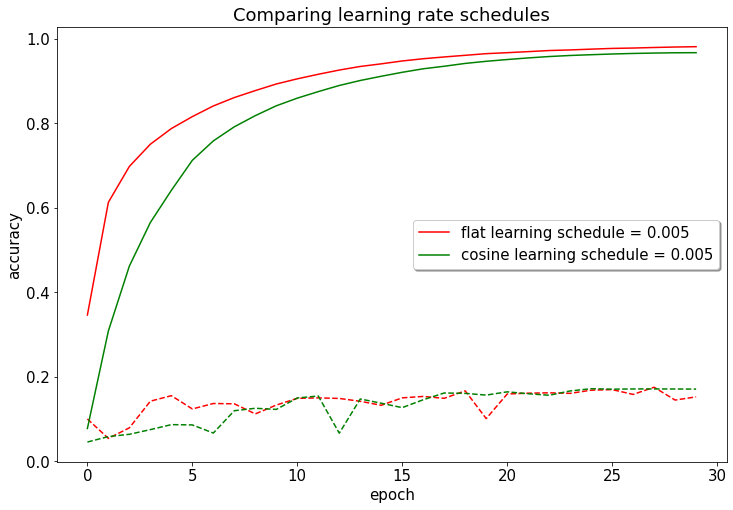

In [2]:
eval.plotting.accuracy_noloss(title = "Comparing learning rate schedules", index1="913", label_1="flat learning schedule = 0.005", index2="910", label_2="cosine learning schedule = 0.005")

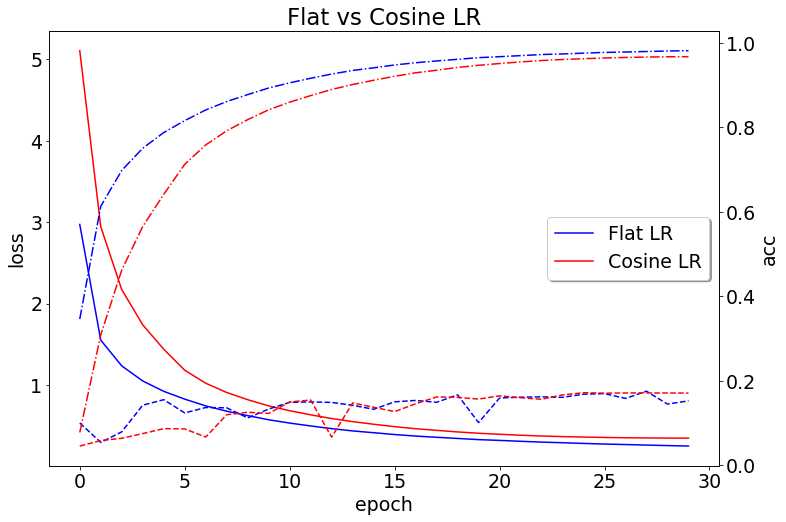

In [5]:
acc1 = pd.read_csv('accuracy/913.csv')
acc2 = pd.read_csv('accuracy/910.csv')
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 19})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Flat vs Cosine LR")
plt.xlabel('epoch')
ax2 = ax.twinx()
ax.plot(acc1['loss'], 'b-', label = 'Flat LR')
ax2.plot(acc1['acc'], 'b', linestyle='dashdot', label = 'acc' )
ax2.plot(acc1['val_acc'], 'b',linestyle='dashed', label = 'val_acc')
ax.plot(acc2['loss'], 'r-', label = 'Cosine LR')
ax2.plot(acc2['acc'], 'r', linestyle='dashdot', label = 'acc' )
ax2.plot(acc2['val_acc'], 'r', linestyle='dashed', label = 'val_acc')
ax.legend(loc = 'right', shadow=True)
ax.set_ylabel('loss')
ax2.set_ylabel('acc')

plt.show()

In [6]:
acc1.iloc[-1]

loss       0.2520
acc        0.9812
val_acc    0.1524
Name: 29, dtype: float64

In [7]:
acc2.iloc[-1]

loss       0.3488
acc        0.9670
val_acc    0.1708
Name: 29, dtype: float64

In [3]:
res913 = pd.read_csv('../runs/913/913_30_results.csv')
res910 = pd.read_csv('../runs/910/910_results.csv')

In [5]:
res910

,enrichment_percentile,threshold,ods_ratio,p-value,k,precision,recall,bins,h
0,0.995,0.386499,10.620180,8.373201e-292,5.0,0.136842,0.003542,0,285
1,0.990,0.300958,7.056546,3.536836e-294,10.0,0.126316,0.006039,5,189
2,0.985,0.251073,5.823124,1.654430e-307,15.0,0.112281,0.007997,10,155
3,0.980,0.216773,5.120646,1.925270e-316,20.0,0.100000,0.009048,15,119
4,0.975,0.190895,4.509602,4.278502e-304,25.0,0.094737,0.011429,20,79
5,0.970,0.171342,4.117700,1.239129e-298,30.0,0.084211,0.012329,25,96
6,0.965,0.154994,3.753605,9.821507e-283,40.0,0.078947,0.015016,30,70
7,0.960,0.141537,3.509138,6.590741e-275,50.0,0.071579,0.016519,35,73
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40,66
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45,75


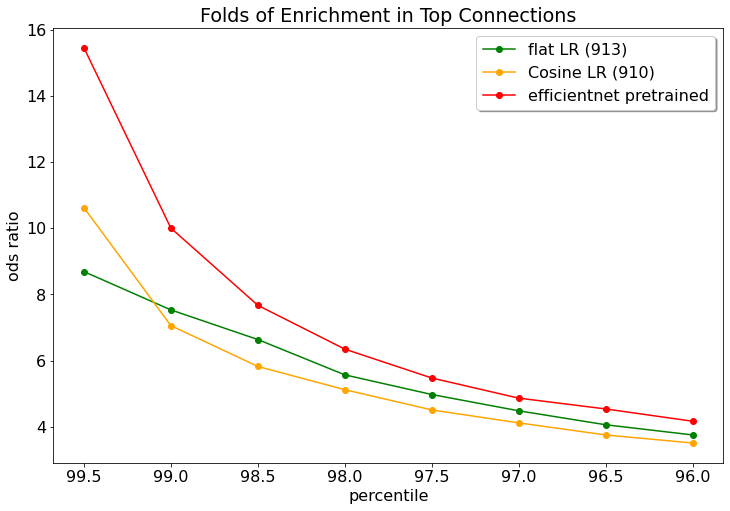

In [9]:
pre =  '/Users/mbornhol/git/neural-profiling/pre-trained/results/'
efficientnet_sphered = pd.read_csv(pre + 'res_enrichment_spherized.csv')
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Folds of Enrichment in Top Connections")
plt.plot(100*res913["enrichment_percentile"], res913["ods_ratio"], marker="o", color="green", label = 'flat LR (913)')
plt.plot(100*res910["enrichment_percentile"], res910["ods_ratio"], marker="o", color="orange", label = 'Cosine LR (910)')
plt.plot(100*efficientnet_sphered["enrichment_percentile"], efficientnet_sphered["ods_ratio"], marker="o", color="red", label = 'efficientnet pretrained')
plt.ylabel('ods ratio')
plt.xlabel('percentile')
ax.invert_xaxis()
plt.legend(loc = 'upper right', shadow=True)
plt.show()

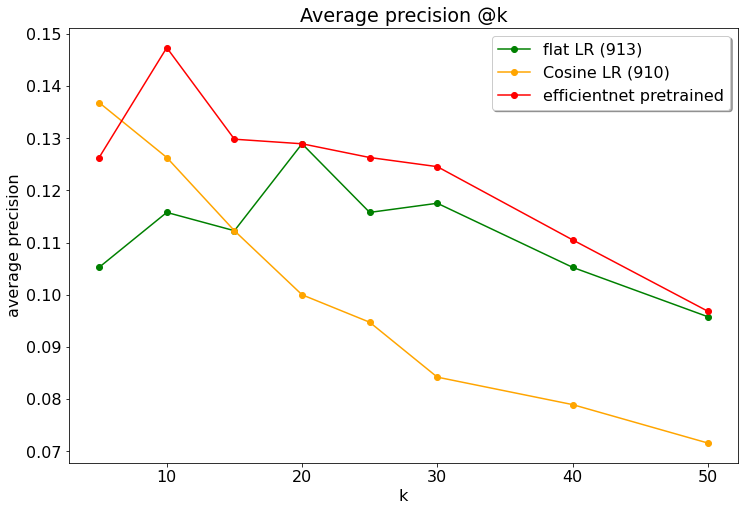

In [10]:
efficientnet_sphered = pd.read_csv(pre + 'res_prec_spherized.csv')
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Average precision @k")
plt.plot(res913["k"], res913["precision"], marker="o", color="green", label = 'flat LR (913)')
plt.plot(res910["k"], res910["precision"], marker="o", color="orange", label = 'Cosine LR (910)')
plt.plot(efficientnet_sphered["k"], efficientnet_sphered["precision"], marker="o", color="red", label = 'efficientnet pretrained')
plt.ylabel('average precision')
plt.xlabel('k')
plt.legend(loc = 'upper right', shadow=True)
plt.show()

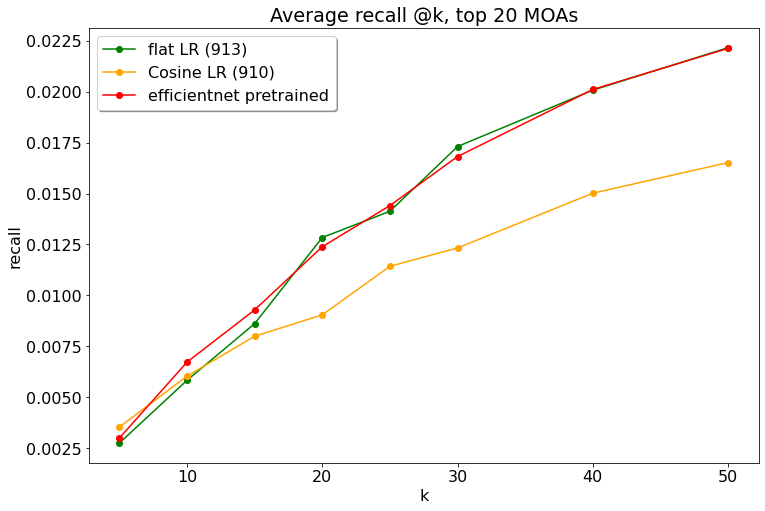

In [11]:
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Average recall @k, top 20 MOAs")
plt.plot(res913["k"], res913["recall"], marker="o", color="green", label = 'flat LR (913)')
plt.plot(res910["k"], res910["recall"], marker="o", color="orange", label = 'Cosine LR (910)')
plt.plot(efficientnet_sphered["k"], efficientnet_sphered["recall"], marker="o", color="red", label = 'efficientnet pretrained')
plt.ylabel('recall')
plt.xlabel('k')
plt.legend(loc = 'upper left', shadow=True)
plt.show()

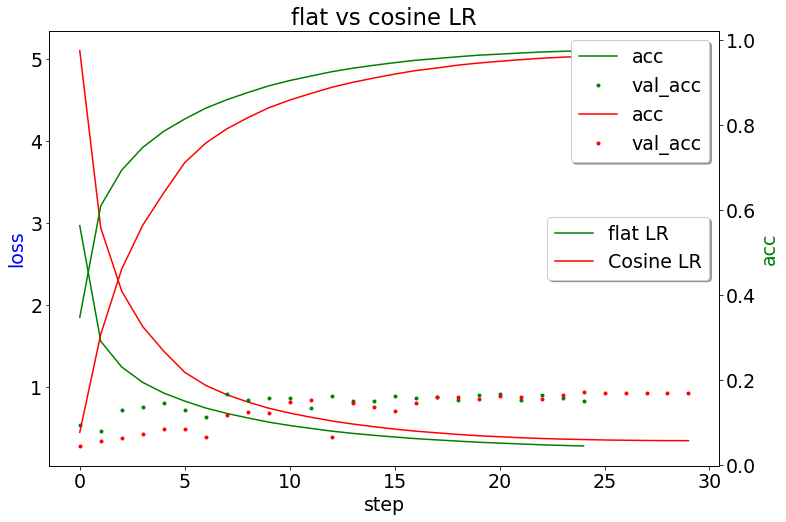

In [16]:
acc916 = pd.read_csv('accuracy/916.csv')
acc910 = pd.read_csv('accuracy/910.csv')

plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 19})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("flat vs cosine LR")
plt.xlabel('step')

ax2 = ax.twinx()
ax.plot(acc916['loss'], 'g-', label = 'flat LR')
ax2.plot(acc916['acc'], 'g-', label = 'acc' )
ax2.plot(acc916['val_acc'], 'g.', label = 'val_acc')

ax.plot(acc910['loss'], 'r-', label = 'Cosine LR')
ax2.plot(acc910['acc'], 'r-', label = 'acc' )
ax2.plot(acc910['val_acc'], 'r.', label = 'val_acc')

ax.legend(loc = 'right', shadow=True)
ax2.legend(loc = 'upper right', shadow=True)
ax.set_ylabel('loss', color='b')
ax2.set_ylabel('acc', color='g')

plt.show()

In [12]:
res916 = pd.read_csv('../runs/916/916_results.csv')
res910 = pd.read_csv('../runs/910/910_results.csv')

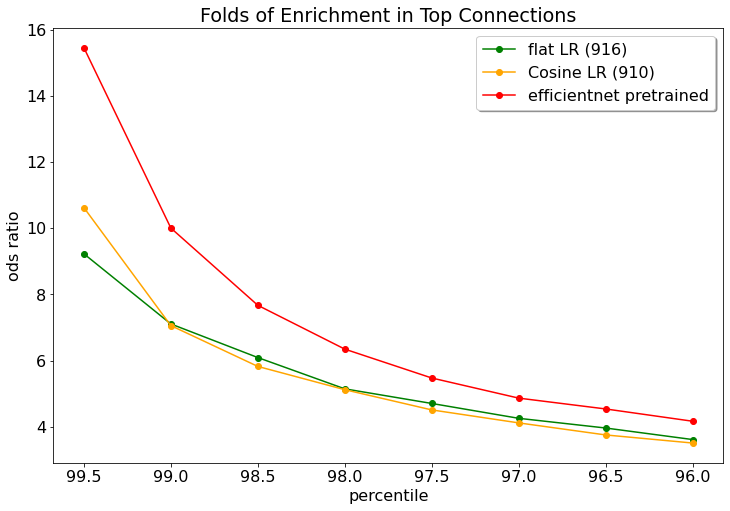

In [13]:
pre =  '/Users/mbornhol/git/neural-profiling/pre-trained/results/'
efficientnet_sphered = pd.read_csv(pre + 'res_enrichment_spherized.csv')
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Folds of Enrichment in Top Connections")
plt.plot(100*res916["enrichment_percentile"], res916["ods_ratio"], marker="o", color="green", label = 'flat LR (916)')
plt.plot(100*res910["enrichment_percentile"], res910["ods_ratio"], marker="o", color="orange", label = 'Cosine LR (910)')
plt.plot(100*efficientnet_sphered["enrichment_percentile"], efficientnet_sphered["ods_ratio"], marker="o", color="red", label = 'efficientnet pretrained')
plt.ylabel('ods ratio')
plt.xlabel('percentile')
ax.invert_xaxis()
plt.legend(loc = 'upper right', shadow=True)
plt.show()

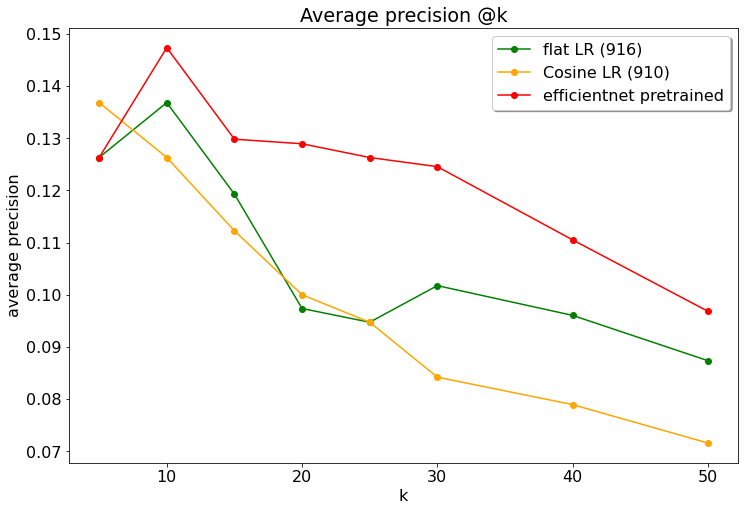

In [14]:
efficientnet_sphered = pd.read_csv(pre + 'res_prec_spherized.csv')
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Average precision @k")
plt.plot(res916["k"], res916["precision"], marker="o", color="green", label = 'flat LR (916)')
plt.plot(res910["k"], res910["precision"], marker="o", color="orange", label = 'Cosine LR (910)')
plt.plot(efficientnet_sphered["k"], efficientnet_sphered["precision"], marker="o", color="red", label = 'efficientnet pretrained')
plt.ylabel('average precision')
plt.xlabel('k')
plt.legend(loc = 'upper right', shadow=True)
plt.show()

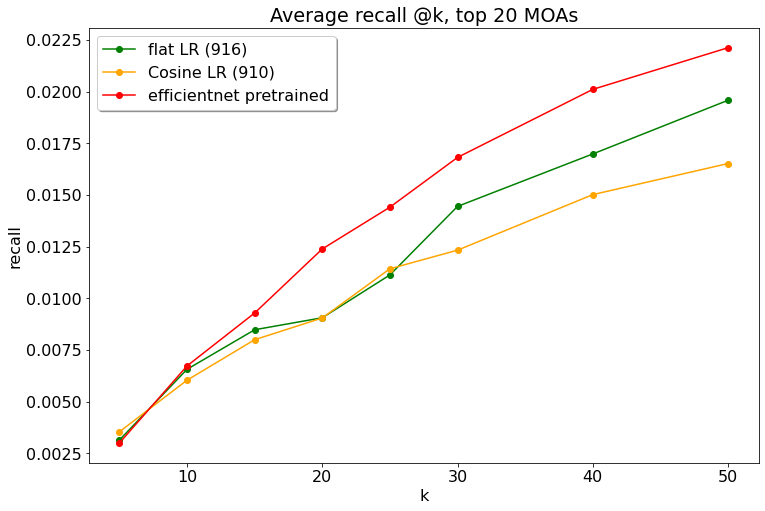

In [15]:
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Average recall @k, top 20 MOAs")
plt.plot(res916["k"], res916["recall"], marker="o", color="green", label = 'flat LR (916)')
plt.plot(res910["k"], res910["recall"], marker="o", color="orange", label = 'Cosine LR (910)')
plt.plot(efficientnet_sphered["k"], efficientnet_sphered["recall"], marker="o", color="red", label = 'efficientnet pretrained')
plt.ylabel('recall')
plt.xlabel('k')
plt.legend(loc = 'upper left', shadow=True)
plt.show()


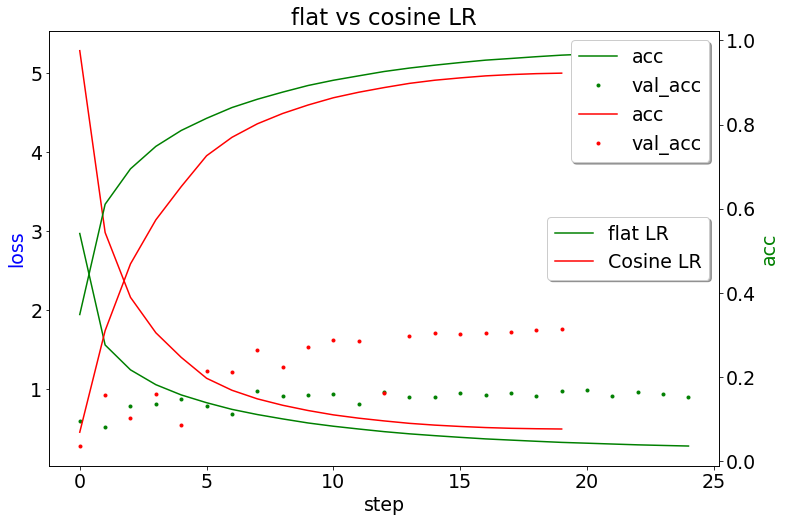

In [3]:
acc916 = pd.read_csv('accuracy/916.csv')
acc917 = pd.read_csv('accuracy/917.csv')

plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 19})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("flat vs cosine LR")
plt.xlabel('step')

ax2 = ax.twinx()
ax.plot(acc916['loss'], 'g-', label = 'flat LR')
ax2.plot(acc916['acc'], 'g-', label = 'acc' )
ax2.plot(acc916['val_acc'], 'g.', label = 'val_acc')

ax.plot(acc917['loss'], 'r-', label = 'Cosine LR')
ax2.plot(acc917['acc'], 'r-', label = 'acc' )
ax2.plot(acc917['val_acc'], 'r.', label = 'val_acc')

ax.legend(loc = 'right', shadow=True)
ax2.legend(loc = 'upper right', shadow=True)
ax.set_ylabel('loss', color='b')
ax2.set_ylabel('acc', color='g')

plt.show()


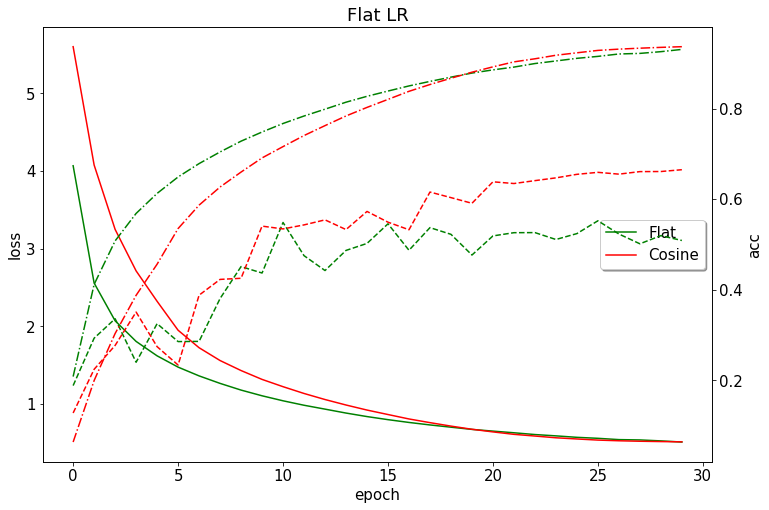

In [7]:
# newer


eval.plotting.accuracy(title="Flat LR", index1='1022', label_1='Flat', index2='1008', label_2='Cosine')


In [8]:

res1 = pd.read_csv('../runs/1022/results.csv')
res2 = pd.read_csv('../runs/1008/results.csv')

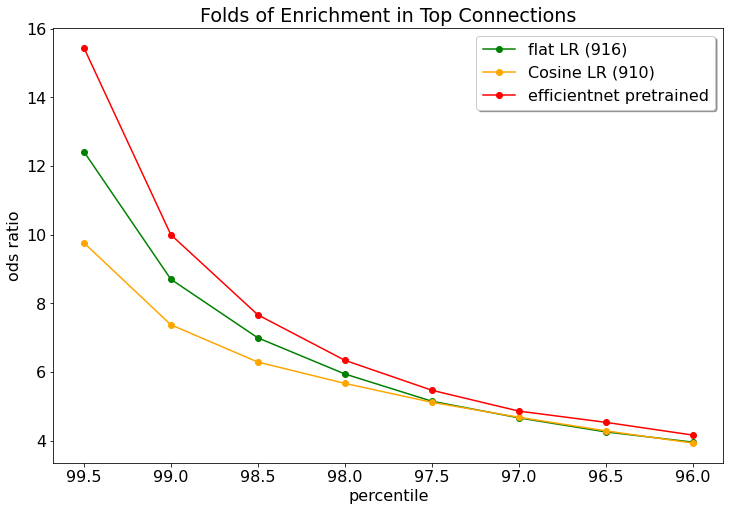

In [9]:
pre =  '/Users/mbornhol/git/neural-profiling/pre-trained/results/'
efficientnet_sphered = pd.read_csv(pre + 'res_enrichment_spherized.csv')
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Folds of Enrichment in Top Connections")
plt.plot(100*res1["enrichment_percentile"], res1["ods_ratio"], marker="o", color="green", label = 'flat LR (1022)')
plt.plot(100*res2["enrichment_percentile"], res2["ods_ratio"], marker="o", color="orange", label = 'Cosine LR (1008)')
plt.plot(100*efficientnet_sphered["enrichment_percentile"], efficientnet_sphered["ods_ratio"], marker="o", color="red", label = 'efficientnet pretrained')
plt.ylabel('ods ratio')
plt.xlabel('percentile')
ax.invert_xaxis()
plt.legend(loc = 'upper right', shadow=True)
plt.show()

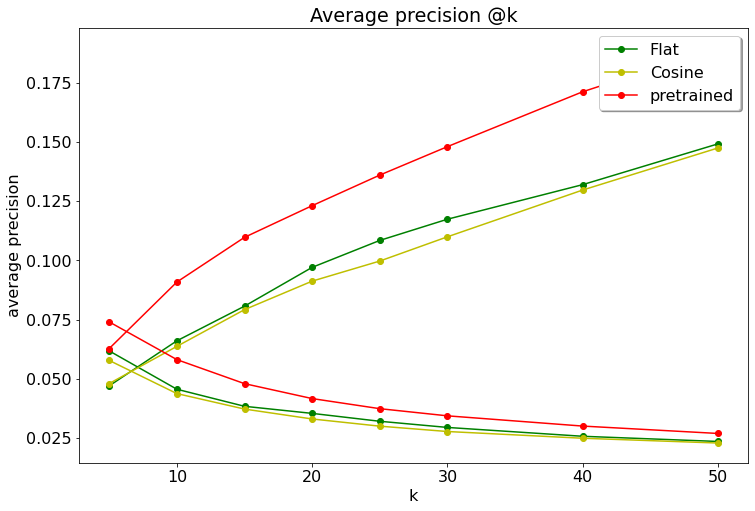

In [11]:

pretrained = pd.read_csv("/Users/mbornhol/git/neural-profiling/00_thesis/plot_storage/pre_tr_eff_pre.csv")
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Average precision @k")
plt.plot(res1["k"], res1["precision"], marker="o", color="green", label = 'Flat')
plt.plot(res1["k"], res1["recall"], marker="o", color="g")
plt.plot(res2["k"], res2["precision"], marker="o", color="y", label = 'Cosine')
plt.plot(res2["k"], res2["recall"], marker="o", color="y")
# plt.plot(res3["k"], res3["precision"], marker="o", color="b", label = 'BS 32')
# plt.plot(res3["k"], res3["recall"], marker="o", color="b")
plt.plot(pretrained["k"], pretrained["precision"], marker="o", color="red", label = 'pretrained')
plt.plot(pretrained["k"], pretrained["recall"], marker="o", color="red")
plt.ylabel('average precision')
plt.xlabel('k')
plt.legend(loc = 'upper right', shadow=True)
plt.show()